<h1>Histogram and Intensity Transformations</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


Pixel Transforms are operations you perform one pixel at a time. In this lab, you will start by creating histograms. Histograms display the intensity of the image and can be used to optimize image characteristics. You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness. In the last portion of the lab, you will use thresholding to segment objects from images.


<ul>
    <li><a href='#PT'>Pixel Transforms  </a>
        <ul>
            <li>Histograms </li>
            <li>Intensity Transformations</li>
            <li>Thresholding and Simple Segmentation </li>   
</ul>


----


Download the image for the lab


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


We will be using these imported functions in the lab


In [2]:
import matplotlib.pyplot as plt   # Thư viện dùng để hiển thị ảnh, vẽ biểu đồ
import cv2                        # Thư viện OpenCV dùng để xử lý ảnh và video
import numpy as np                # Thư viện NumPy dùng để xử lý mảng và ma trận (ảnh là ma trận)


First, lets define a helper function to plot two images side-by-side. You will not need to understand this code at this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [3]:
def plot_image(image_1, image_2, title_1="Orignal", title_2="New Image"):   # Định nghĩa hàm plot_image
    plt.figure(figsize=(10,10))        # Tạo khung hình vẽ, kích thước 10x10 inch
    plt.subplot(1, 2, 1)               # Chia khung thành 1 hàng, 2 cột, chọn ô thứ 1
    plt.imshow(image_1, cmap="gray")   # Hiển thị ảnh 1 (ảnh xám)
    plt.title(title_1)                 # Đặt tiêu đề cho ảnh 1
    plt.subplot(1, 2, 2)               # Chọn ô thứ 2
    plt.imshow(image_2, cmap="gray")   # Hiển thị ảnh 2 (ảnh xám)
    plt.title(title_2)                 # Đặt tiêu đề cho ảnh 2
    plt.show()                         # Hiển thị toàn bộ hình vẽ ra màn hình


Lets define another helper function. The following one will plot two histograms side-by-side. Again, you do not need to understand the body of this function at this moment.


In [4]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])   # Tạo mảng giá trị mức xám từ 0 đến 255
    plt.subplot(1, 2, 1)    # Chia khung hình: 1 hàng, 2 cột, chọn ô thứ 1
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)  # Vẽ histogram ảnh gốc
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)     # Chọn ô thứ 2
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)  # Vẽ histogram ảnh mới
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()   # Hiển thị histogram của 2 ảnh

# Histograms  


A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. We use <code>cv.calcHist()</code> to generate the histogram. Here are the parameter values:
<p>
    <code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for this course it will always be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code>   
</p>
For real images, <code>L</code> is <code>256</code>.


## Toy Example


Consider the toy array with intensity values ranging from 0 to 2. We can create a histogram. Its first element is the number of zeros in the image (in this case, 1); its second element is the number of ones in the image (in this case, 5), and so on.


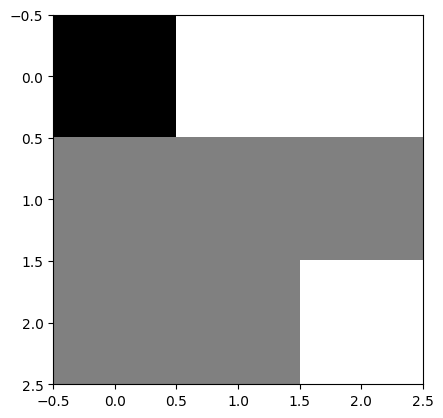

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [5]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]], dtype=np.uint8)
# Tạo một ảnh nhỏ dạng ma trận 3x3, kiểu số nguyên không dấu 
plt.imshow(toy_image, cmap="gray")
# Hiển thị ma trận như một ảnh xám
plt.show()
# Hiển thị ảnh ra màn hình
print("toy_image:", toy_image)
# In giá trị ma trận của ảnh ra màn hình


We can use the <code>caclHist</code> function, in this case, we use only three bins as there are only three values, and the index of the bins are from 1 to 3.

**TODO:** @Joe 


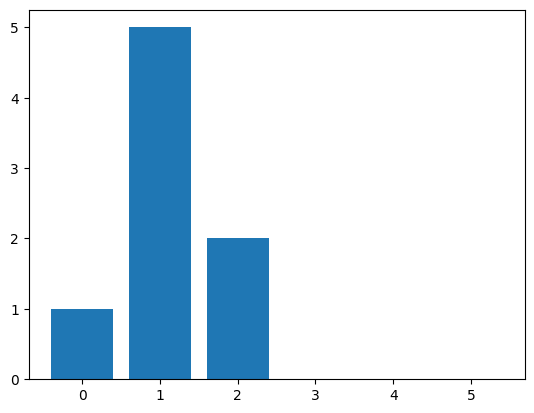

In [6]:
plt.bar([x for x in range(6)], [1,5,2,0,0,0])
# Vẽ biểu đồ cột:
# trục X là các giá trị từ 0 đến 5
# trục Y là chiều cao các cột tương ứng
plt.show()
# Hiển thị biểu đồ ra màn hình


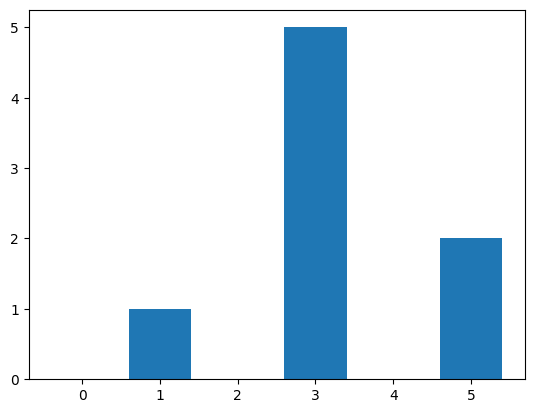

In [7]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
# Vẽ biểu đồ cột:
# trục X là các giá trị từ 0 đến 5
# trục Y là chiều cao các cột tương ứng
plt.show()
# Hiển thị biểu đồ ra màn hình

The histogram is a function where $h[r]$  where   $r \in {0,1,2} $. In the above example  $h[0]=1$,$h[1]=5$ and $h[2]=3$


## Gray Scale Histograms 




Histograms are used in grayscale images.  Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Consider the following "Gold Hill" image:


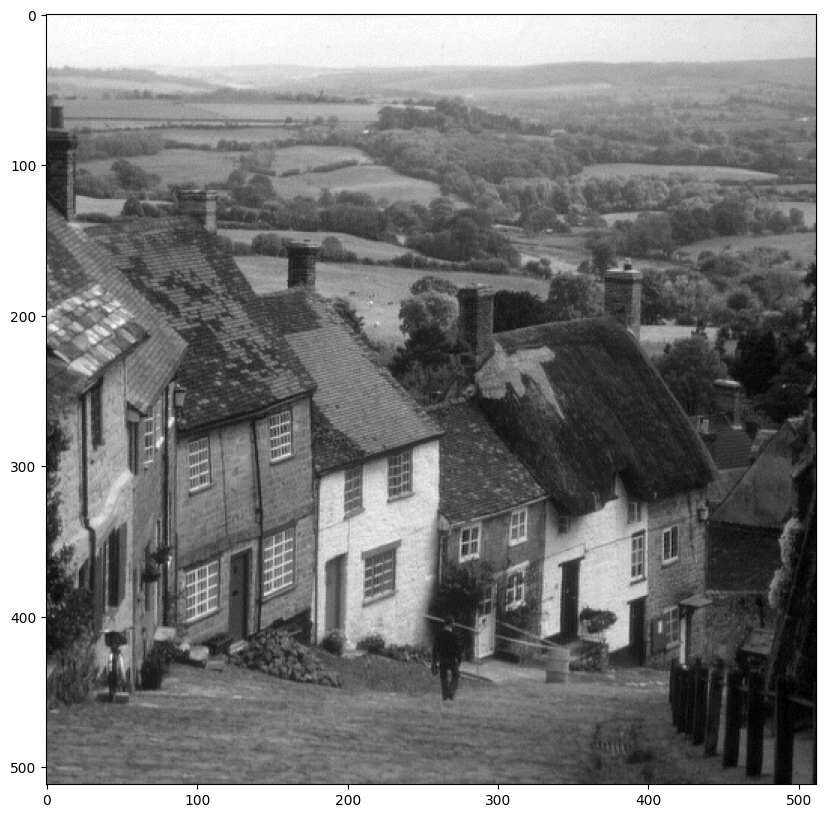

In [8]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)  # Đọc ảnh "goldhill.bmp" ở dạng ảnh xám
plt.figure(figsize=(10,10))     # Tạo khung hiển thị với kích thước 10x10 inch
plt.imshow(goldhill,cmap="gray")    # Hiển thị ảnh xám
plt.show()  # Hiển thị ảnh ra màn hình

We can calculate the histogram using the `calcHist` function from the `cv2` module as follows, the shape is 256.


In [9]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])
# Tính histogram của ảnh goldhill:
# đếm số pixel cho mỗi mức xám từ 0 đến 255

We can plot it as a bar graph, the $x$-axis are the pixel intensities and the $y$-axis is the number of times of occurrences that the corresponding pixel intensity value on $x$-axis occurred.


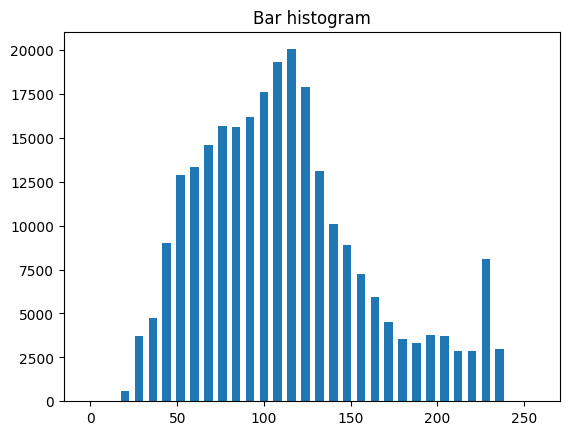

In [10]:
intensity_values = np.array([x for x in range(hist.shape[0])])
# Tạo mảng các mức cường độ 
plt.bar(intensity_values, hist[:,0], width=5)
# Vẽ biểu đồ cột histogram:
# trục X là mức xám, trục Y là số pixel
plt.title("Bar histogram")
# Đặt tiêu đề cho biểu đồ
plt.show()
# Hiển thị biểu đồ


The histogram is a function where $h[r]$  where   $r \in {0,1,..,255} $.


We can convert it to a probability mass function by normalizing it by the number of pixels:


In [11]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])
# Chuẩn hóa histogram:
# chia số pixel mỗi mức xám cho tổng số pixel của ảnh → thu được PMF 

We can plot as a continuous function:


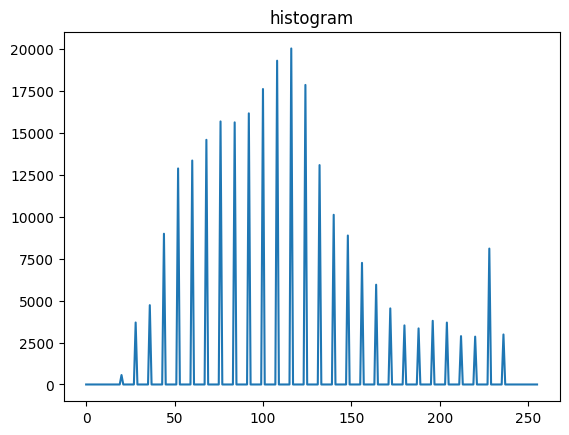

In [12]:
plt.plot(intensity_values, hist)
# Vẽ histogram dưới dạng đường:
# trục X là mức xám, trục Y là số pixel
plt.title("histogram")
# Đặt tiêu đề cho biểu đồ
plt.show()
# Hiển thị biểu đồ



We can also apply a histogram to each image color channel:


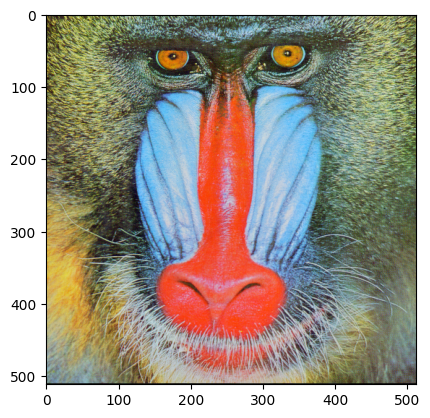

In [13]:
baboon = cv2.imread("baboon.png")
# Đọc ảnh màu baboon 
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
# Chuyển ảnh từ BGR sang RGB để hiển thị đúng màu bằng matplotlib
plt.show()
# Hiển thị ảnh ra màn hình


In the loop, the value for <code>i</code> specifies what color channel <code>calcHist</code> is going to calculate the histogram for.   


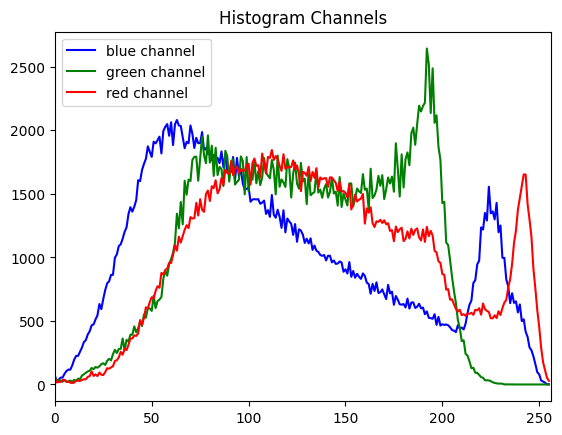

In [14]:
color = ('blue','green','red')
# Danh sách các kênh màu B, G, R
for i, col in enumerate(color):
    # i: chỉ số kênh (0-B, 1-G, 2-R), col: tên màu
    histr = cv2.calcHist([baboon], [i], None, [256], [0,256])
    # Tính histogram cho từng kênh màu
    plt.plot(intensity_values, histr, color=col, label=col+" channel")
    # Vẽ histogram của kênh màu tương ứng
    plt.xlim([0,256])
    # Giới hạn trục X từ 0 đến 255
plt.legend()
# Hiển thị chú thích các kênh màu
plt.title("Histogram Channels")
# Đặt tiêu đề biểu đồ
plt.show()
# Hiển thị biểu đồ histogram màu


#  Intensity Transformations


It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


## Image Negatives


Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \qquad \text{and} \qquad s=255-r
$$


We can perform intensity transformation on the toy image where $L = 3$:


In [15]:
#neg_toy_image = -1 * toy_image + 255
neg_toy_image = -1 * toy_image.astype('int16') + 255    # Chuyển ảnh sang int16 để tính toán âm rồi lấy ảnh âm
neg_toy_image = neg_toy_image.astype('uint8')  # Chuyển lại về uint8 sau khi tính toán

print("toy image\n", neg_toy_image) # In ma trận ảnh sau khi đảo màu
print("image negatives\n", neg_toy_image)   # In lại ảnh âm (negative image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


We see darker intensity’s become brighter and brighter become darker, middle intensity’s remain the same.


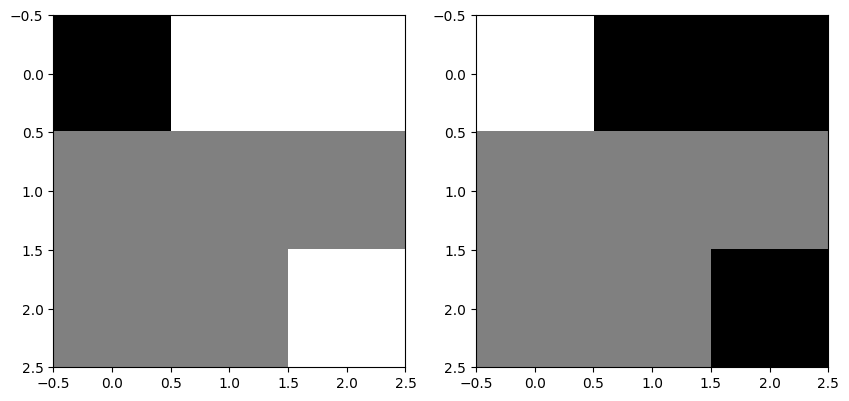

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [16]:
plt.figure(figsize=(10,10))     # Tạo khung hiển thị với kích thước 10x10 inch
plt.subplot(1, 2, 1) # Chia khung: 1 hàng, 2 cột, chọn ô thứ 1
plt.imshow(toy_image,cmap="gray")   # Hiển thị ảnh gốc (ảnh xám)
plt.subplot(1, 2, 2)    # Chọn ô thứ 2
plt.imshow(neg_toy_image,cmap="gray")   # Hiển thị ảnh âm (negative image)
plt.show()  # Hiển thị hai ảnh
print("toy_image:",toy_image)   # In ma trận ảnh gốc ra màn hình

Reversing image intensity has many applications, including making it simpler to analyze medical images. Consider the mammogram with micro-calcifications on the upper quadrant:


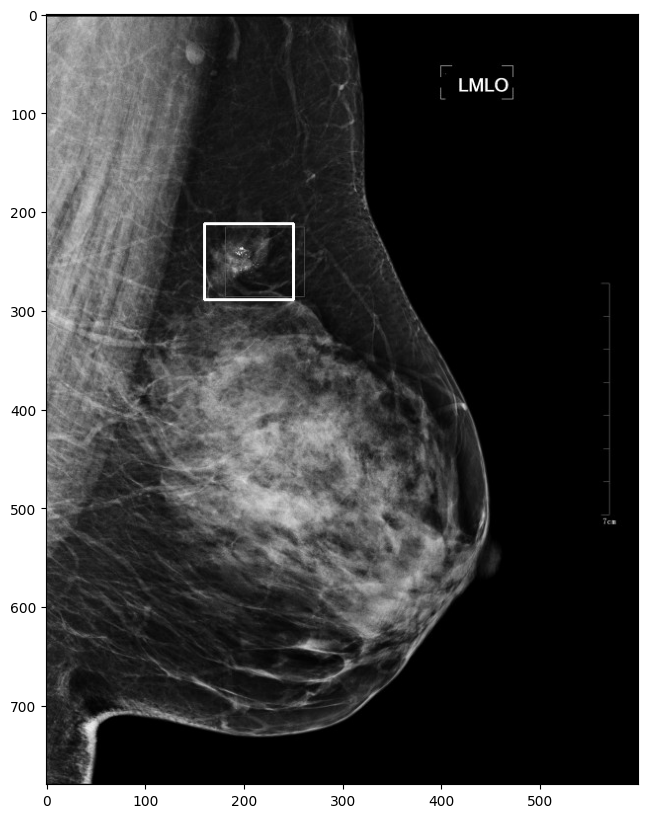

In [17]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
# Đọc ảnh "mammogram.png" ở dạng ảnh xám
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color=255, thickness=2)
# Vẽ hình chữ nhật lên ảnh:
# pt1: góc trên-trái, pt2: góc dưới-phải
# color=255 là màu trắng (ảnh xám)
# thickness=2 là độ dày viền
plt.figure(figsize=(10,10))
# Tạo khung hiển thị
plt.imshow(image, cmap="gray")
# Hiển thị ảnh xám
plt.show()
# Hiển thị ảnh ra màn hình


We can apply the intensity transformation:


In [18]:
#img_neg = -1 * image + 255
img_neg = -1 * image.astype('int16') + 255  # Chuyển ảnh sang int16 để tính toán âm rồi lấy ảnh âm
img_neg = img_neg.astype('uint8')  # Chuyển lại về uint8 sau khi tính toán

We see the micro-calcifications in the image negatives is easier it is to analyze:


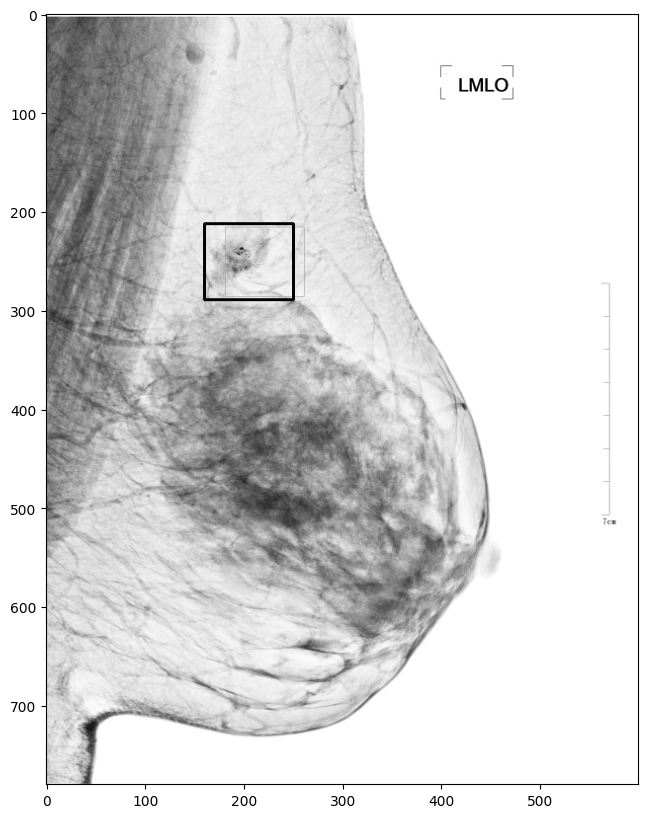

In [19]:
plt.figure(figsize=(10,10))
# Tạo khung 10x10 inch
plt.imshow(img_neg, cmap="gray")
# Hiển thị ảnh âm ở dạng ảnh xám
plt.show()
# Hiển thị ảnh ra màn hình


## Brightness and contrast adjustments


We can use multiplication by $\alpha$ for contrast control and addition by $\beta$ to improve brightness control. This applies the Intensity Transformation as well. The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.


 Rather than implementing via array operations, we use the function  <code>convertScaleAbs</code>. It scales, calculates absolute values, and converts the result to 8-bit so the values fall between $[0,255]$. For brightness control, we can set $\alpha$ to 1 and $\beta$ to 100: Remember the Good Hill image, it’s dark and hazy so let's see if we can improve it. 


In [20]:
alpha = 1 # Hệ số tương phản (contrast)
beta =  100  # Hệ số độ sáng (brightness)
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
# Tạo ảnh mới theo công thức:
# new_image = |alpha * pixel + beta|
# Kết quả được ép về kiểu uint8

We can plot the brighter image, it's much brighter :


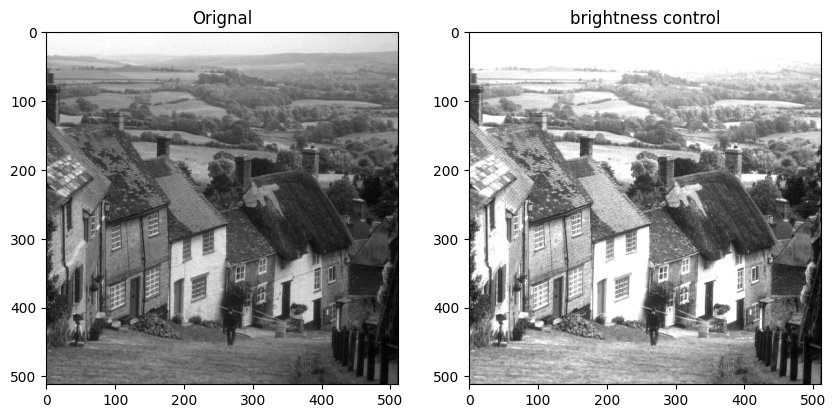

In [21]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")
# Hiển thị ảnh gốc và ảnh sau khi điều chỉnh độ sáng

We see the brighter image's histogram is shifted:     


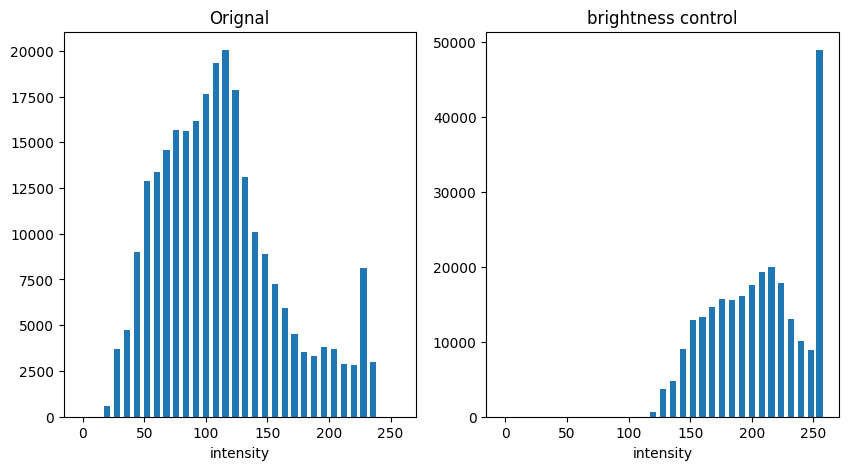

In [22]:
plt.figure(figsize=(10,5))
# Tạo khung hiển thị cho biểu đồ
plot_hist(goldhill, new_image, "Orignal", "brightness control")
# Vẽ và so sánh histogram của ảnh gốc và ảnh sau khi tăng độ sáng

We can increase the contrast by increasing $\alpha$:


In [23]:
plt.figure(figsize=(10,5))  # Tạo khung hiển thị
alpha = 2# Hệ số tương phản (contrast)
beta = 0 # Hệ số độ sáng (brightness)
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
# Tạo ảnh mới với tương phản tăng theo công thức:new_image = |alpha * pixel + beta|

<Figure size 1000x500 with 0 Axes>

We can plot the image and its corresponding histogram:


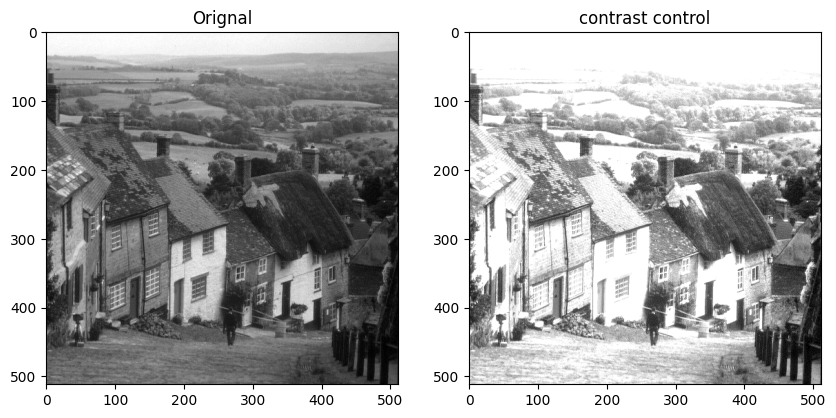

In [24]:
plot_image(goldhill,new_image,"Orignal","contrast control")
# Hiển thị ảnh gốc và ảnh sau khi điều chỉnh độ tương phản

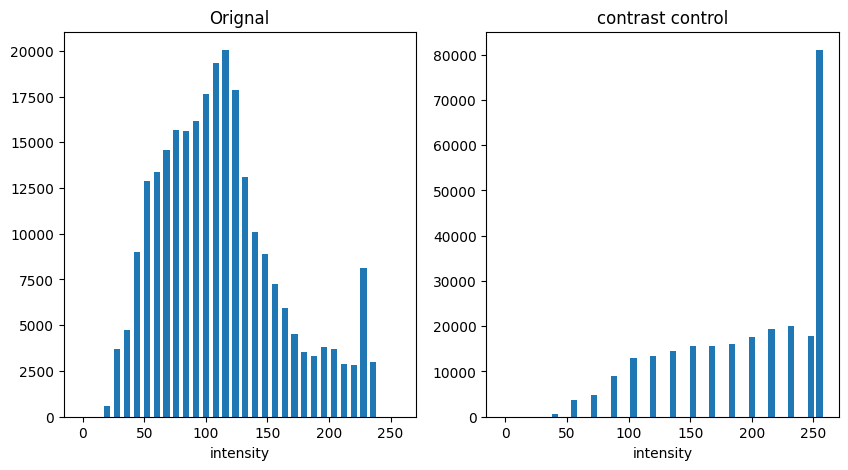

In [25]:
plt.figure(figsize=(10,5))  # Tạo khung hiển thị cho biểu đồ
plot_hist(goldhill, new_image,"Orignal","contrast control")
# Vẽ và so sánh histogram của ảnh gốc và ảnh sau khi tăng tương phản

When plotting the image we see it's too bright. We can adapt the brightness by making the image darker and increasing the contrast at the same time. 


In [26]:
plt.figure(figsize=(10,5))
# Tạo khung hiển thị
alpha = 3    # Hệ số tương phản (contrast)
# alpha > 1: tăng mạnh tương phản
beta = -200  # Hệ số độ sáng (brightness)
# beta < 0: làm ảnh tối đi
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)
# Tạo ảnh mới theo công thức: new_image = |alpha * pixel + beta|


<Figure size 1000x500 with 0 Axes>

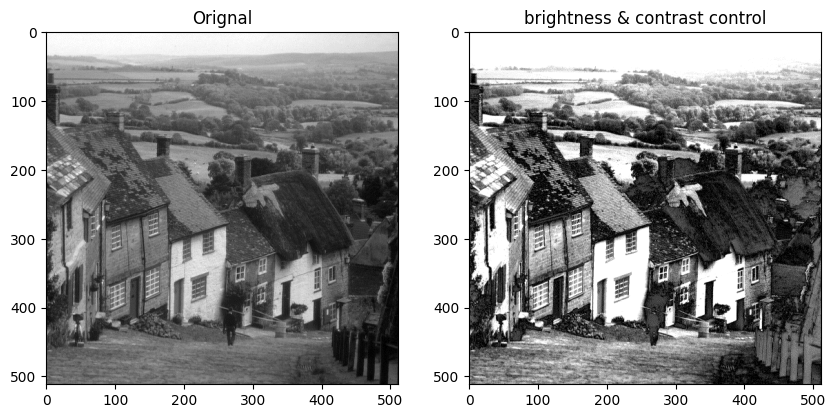

In [27]:
plot_image(goldhill, new_image, "Orignal", "brightness & contrast control")

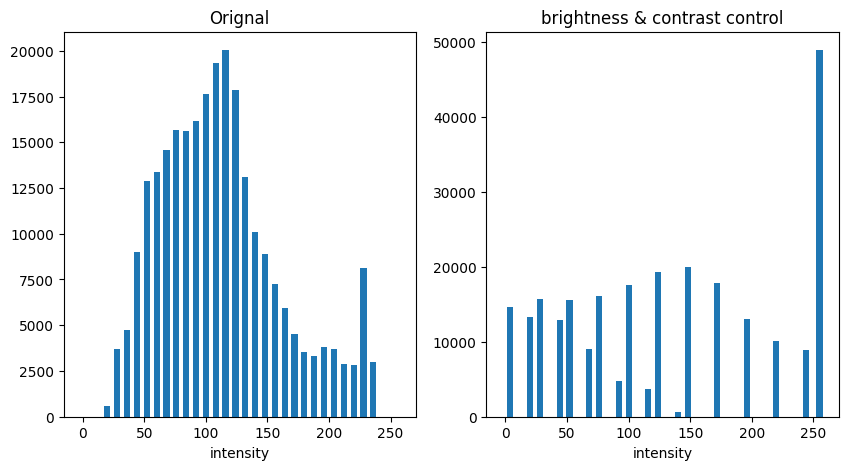

In [28]:
plt.figure(figsize=(10,5))# Tạo khung hiển thị cho biểu đồ
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")
# So sánh histogram ảnh gốc và ảnh sau khi điều chỉnh cả độ sáng và độ tương phản

There are other nonlinear methods to improve contrast and brightness, these methods have different sets of parameters. In general, it’s difficult to manually adjust the contrast and brightness parameter, but there are algorithms that improve contrast automatically.


## Histogram Equalization


Histogram Equalization increases the contrast of images, by stretching out the range of the grayscale pixels; It does this by flatting  the histogram. We simply apply the function <code>cv2.equalizeHist</code>.


In [29]:
zelda = cv2.imread("zelda.png", cv2.IMREAD_GRAYSCALE)
# Đọc ảnh "zelda.png" ở dạng ảnh xám
new_image = cv2.equalizeHist(zelda)
# Cân bằng histogram ảnh xám
# Giúp tăng độ tương phản cho ảnh

# new_image = new_image.astype('uint8')



We can compare the image before and after Histogram Equalization, we see the contrast is improved. We see after the Histogram Equalization is applied, the histogram is stretched out:


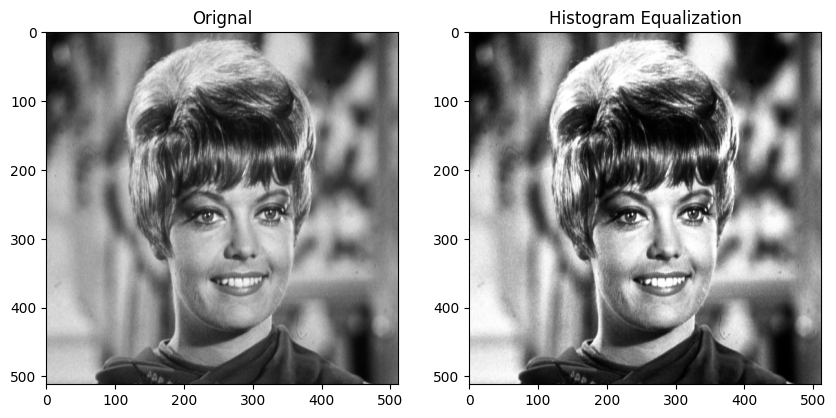

In [30]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")
# Hiển thị ảnh gốc và ảnh sau khi cân bằng histogram để so sánh

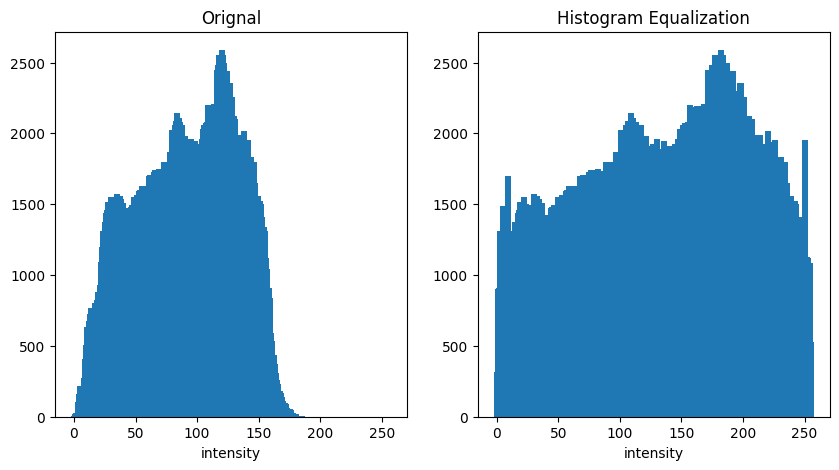

In [31]:
plt.figure(figsize=(10,5))
# Tạo khung hiển thị cho biểu đồ
plot_hist(zelda, new_image, "Orignal", "Histogram Equalization")
# So sánh histogram của ảnh gốc và ảnh sau khi cân bằng histogram


## Thresholding and Simple Segmentation 


Thresholding is used in image segmentation this means extracting objects from an image. Image segmentation is used in many applications including extracting text, medical imaging, and industrial imaging.
Thresholding an image takes a threshold; If a particular pixel (i,j) is greater than that threshold it will set that pixel to some value usually 1 or 255, otherwise, it will set it to another value, usually zero. We can write a Python function that will perform thresholding and output a new image given some input grayscale image:


In [32]:
def thresholding(input_img,threshold,max_value=255, min_value=0):# Hàm phân ngưỡng ảnh (thresholding)
    N,M=input_img.shape     # Lấy kích thước ảnh: N hàng, M cột
    image_out=np.zeros((N,M),dtype=np.uint8)# Tạo ảnh đầu ra toàn giá trị 0, kiểu uint8
        
    for i  in range(N):
        for j in range(M): # Duyệt từng pixel trong ảnh
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
                # Nếu pixel lớn hơn ngưỡng → gán giá trị trắng
            else:
                image_out[i,j]=min_value# Ngược lại → gán giá trị đen
                
    return image_out          # Trả về ảnh sau khi phân ngưỡng                

Consider the following toy image:


In [33]:
toy_image# ma trận NumPy biểu diễn ảnh xám

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

We can apply thresholding, by setting all the values less than two to zero. 


In [34]:
threshold = 1
# Giá trị ngưỡng để phân loại pixel
max_value = 2
# Giá trị gán cho pixel > threshold
min_value = 0
# Giá trị gán cho pixel ≤ threshold
thresholding_toy = thresholding(
    toy_image,
    threshold=threshold,
    max_value=max_value,
    min_value=min_value
)
# Áp dụng hàm thresholding lên toy_image
thresholding_toy
# Hiển thị ma trận ảnh sau khi phân ngưỡng


array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

We can compare the two images. In the new image we see all the gray values are now black:


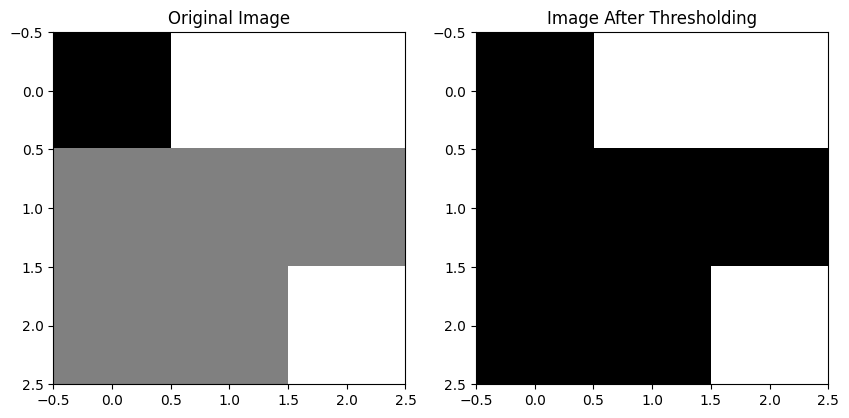

In [35]:
plt.figure(figsize=(10, 10))
# Tạo khung hiển thị kích thước 10x10
plt.subplot(1, 2, 1)
# Chia khung: 1 hàng, 2 cột, chọn ô thứ 1
plt.imshow(toy_image, cmap="gray")
# Hiển thị ảnh gốc
plt.title("Original Image")
# Tiêu đề ảnh gốc
plt.subplot(1, 2, 2)
# Chọn ô thứ 2
plt.imshow(thresholding_toy, cmap="gray")
# Hiển thị ảnh sau khi phân ngưỡng
plt.title("Image After Thresholding")
# Tiêu đề ảnh sau xử lý
plt.show()
# Hiển thị hai ảnh


Consider the cameraman image:


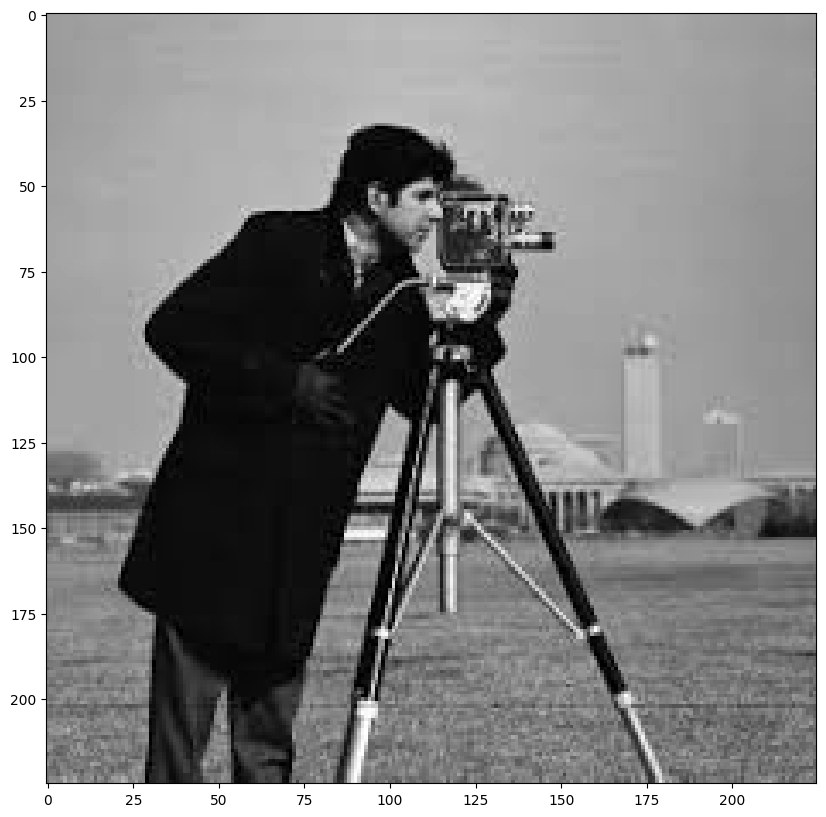

In [36]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
# Đọc ảnh "cameraman.jpeg" ở dạng ảnh xám
plt.figure(figsize=(10, 10))
# Tạo khung hiển thị kích thước 10x10
plt.imshow(image, cmap="gray")
# Hiển thị ảnh xám
plt.show()
# Hiển thị ảnh ra màn hình


We can see the histogram as two peeks, this means that there is a large proportion of pixels in those two ranges:


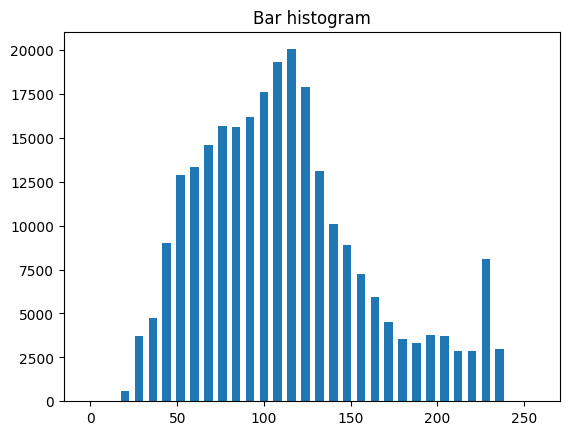

In [37]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
# Tính histogram của ảnh goldhill: đếm số pixel cho mỗi mức xám từ 0 đến 255
plt.bar(intensity_values, hist[:, 0], width=5)
# Vẽ histogram dạng cột: trục X là mức xám, trục Y là số pixel
plt.title("Bar histogram")
# Đặt tiêu đề cho biểu đồ
plt.show()
# Hiển thị biểu đồ


The cameraman corresponds to the darker pixels, therefore we can set the Threshold in such a way as to segment the cameraman. In this case, it looks to be slightly less than 90, let’s give it a try:


In [38]:
threshold = 87
# Giá trị ngưỡng để phân tách ảnh
max_value = 255
# Giá trị gán cho pixel > threshold (màu trắng)
min_value = 0
# Giá trị gán cho pixel ≤ threshold (màu đen)
new_image = thresholding(
    image,
    threshold=threshold,
    max_value=max_value,
    min_value=min_value
)
# Áp dụng phân ngưỡng lên ảnh 


We see the pixels corresponding to the cameraman are now zero and the rest are set to 255:


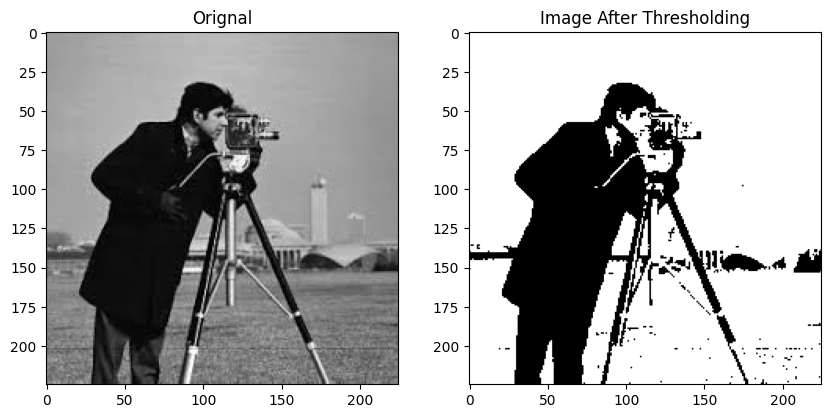

In [39]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")
# Hiển thị ảnh gốc và ảnh sau khi phân ngưỡng để so sánh


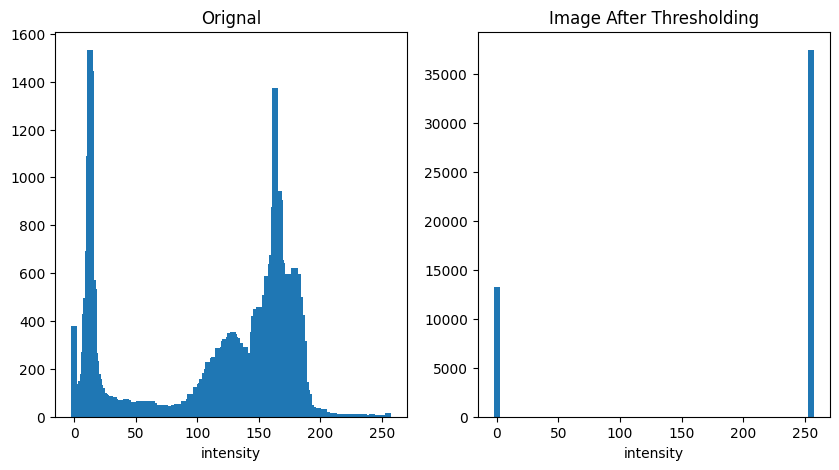

In [40]:
plt.figure(figsize=(10,5))
# Tạo khung hiển thị cho biểu đồ
plot_hist(image, new_image, "Orignal", "Image After Thresholding")
# So sánh histogram ảnh gốc và ảnh sau khi phân ngưỡng


The function <code>cv.threshold</code> Applies a threshold to the gray image, with the following parameters:


<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )</code>


The  parameter thresholding type is the type of thresholding we would like to perform. For example, we have basic thresholding: <code>cv2.THRESH_BINARY</code> this is the type we implemented in the function <code>thresholding</code>, it just a number:


In [41]:
cv2.THRESH_BINARY
# Kiểu phân ngưỡng nhị phân trong OpenCV
# pixel > threshold  → gán max_value
# pixel ≤ threshold  → gán 0

0

We can apply thresholding to the image as follows:


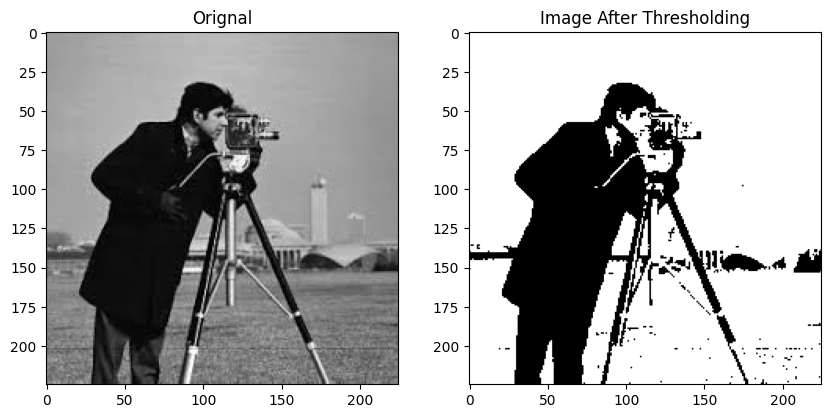

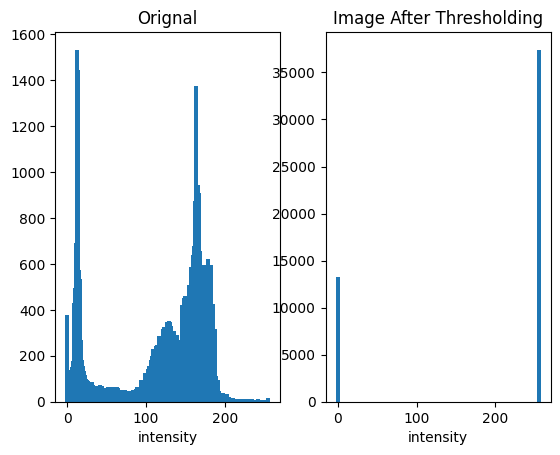

In [42]:
ret, new_image = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY)
# Áp dụng phân ngưỡng nhị phân bằng OpenCV
# ret: giá trị ngưỡng đã dùng
# new_image: ảnh sau khi phân ngưỡng
plot_image(image, new_image, "Orignal", "Image After Thresholding")
# Hiển thị ảnh gốc và ảnh sau khi phân ngưỡng để so sánh
plot_hist(image, new_image, "Orignal", "Image After Thresholding")
# So sánh histogram của ảnh gốc và ảnh sau khi phân ngưỡng


<code>ret</code> is the threshold value and <code>new_image</code> is the image after thresholding has been applied. There are different threshold types, for example, cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value:


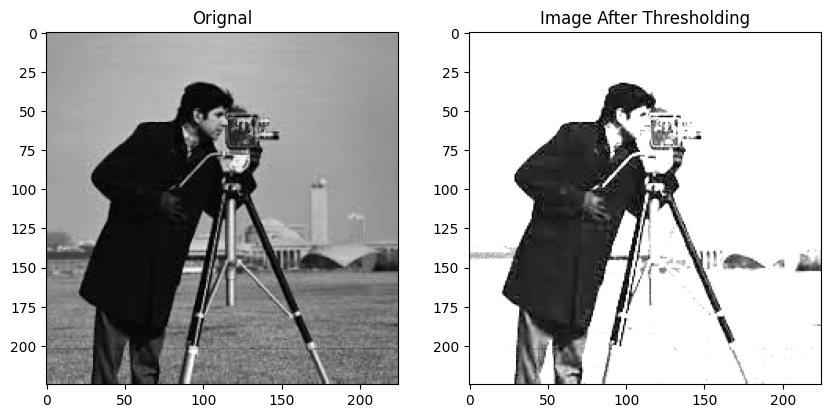

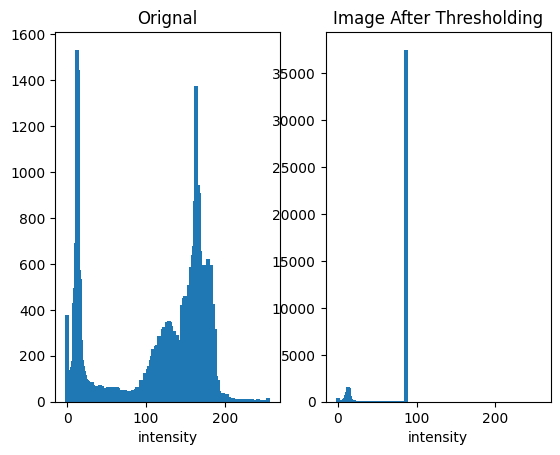

In [43]:
ret, new_image = cv2.threshold(image, 86, 255, cv2.THRESH_TRUNC)
# Phân ngưỡng kiểu TRUNC:
# pixel > 86  → gán bằng 86
# pixel ≤ 86 → giữ nguyên
plot_image(image, new_image, "Orignal", "Image After Thresholding")
# Hiển thị ảnh gốc và ảnh sau khi phân ngưỡng
plot_hist(image, new_image, "Orignal", "Image After Thresholding")
# So sánh histogram của ảnh gốc và ảnh sau khi phân ngưỡng


We see that the darker elements have not changed and the lighter values are set to 255.


 Otsu's method <code>cv2.THRESH_OTSU</code> avoids having to choose a value and determines it automatically, using the histogram.


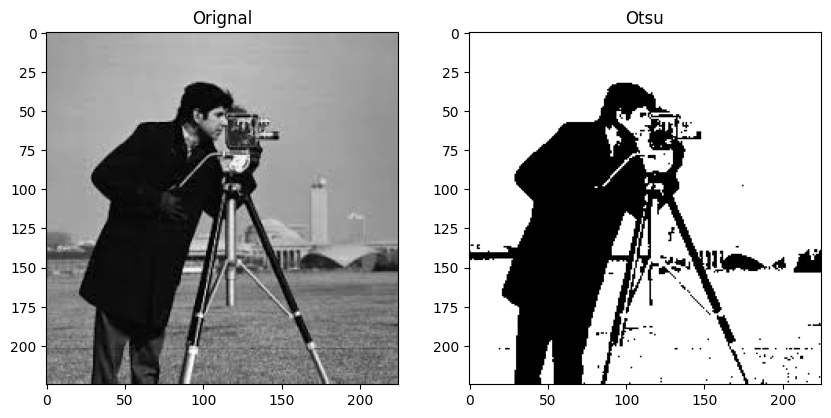

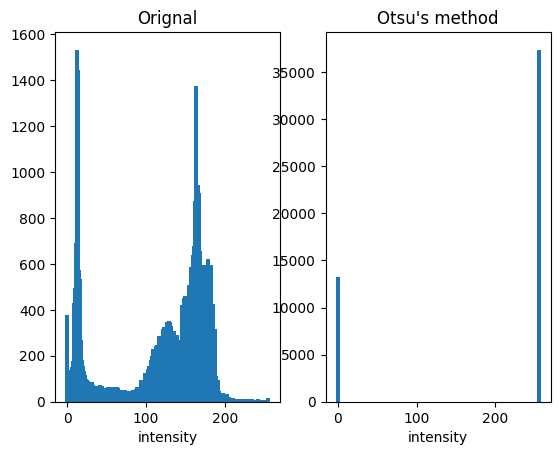

In [44]:
ret, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
# Phân ngưỡng Otsu:
# OpenCV tự động tìm ngưỡng tối ưu
# ret: giá trị ngưỡng Otsu tìm được
# otsu: ảnh sau khi phân ngưỡng
plot_image(image, otsu, "Orignal", "Otsu")
# Hiển thị ảnh gốc và ảnh sau khi áp dụng Otsu
plot_hist(image, otsu, "Orignal", "Otsu's method")
# So sánh histogram của ảnh gốc và ảnh sau khi phân ngưỡng Otsu


We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [45]:
ret# Là giá trị ngưỡng (threshold) mà OpenCV sử dụng

88.0

# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->
